# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [135]:
# Memuat dataset hasil clustering
df = pd.read_csv("hasil_clustering.csv")

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
df.head()


,provinsi,jenis,daerah,tahun,periode,gk,tahun_bin,Cluster,PCA1,PCA2,PCA3
0,ACEH,MAKANAN,PERKOTAAN,-1.208955,MARET,-0.067946,Lama,0,-2.905181,1.551267,NaN
1,ACEH,MAKANAN,PERKOTAAN,-1.208955,SEPTEMBER,-0.013644,Lama,0,-2.843913,1.652591,NaN
2,ACEH,MAKANAN,PERKOTAAN,-0.820896,MARET,0.012859,Lama,0,-2.236028,1.233926,NaN
3,ACEH,MAKANAN,PERKOTAAN,-0.820896,SEPTEMBER,0.099970,Lama,0,-2.137743,1.396469,NaN
4,ACEH,MAKANAN,PERDESAAN,-1.208955,MARET,-0.043587,Lama,0,-2.877697,1.596719,NaN


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [137]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Gantilah 'Cluster' dengan nama kolom target hasil clustering
y = df['Cluster']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 4360
Jumlah data testing: 1091


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [139]:
# Cek kolom kategorikal
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Lakukan Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


In [141]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Penjelasan Algoritma yang Digunakan
📌 1. Random Forest Classifier
Random Forest adalah algoritma berbasis ensemble yang terdiri dari banyak Decision Tree. Berikut adalah konsep kerjanya:

🔹 Pembentukan Model

Algoritma ini membangun banyak Decision Tree dari subset data yang berbeda.

Setiap pohon (tree) dilatih dengan sampel acak dari dataset menggunakan teknik Bootstrap Sampling.

Pada setiap node, hanya subset fitur yang dipilih secara acak untuk menghindari overfitting.

🔹 Prediksi

Untuk klasifikasi, setiap pohon memberikan suara (vote), dan kelas yang mendapat suara terbanyak dipilih sebagai hasil akhir.

Untuk regresi, hasil akhirnya adalah rata-rata dari semua prediksi pohon.

🔹 Keunggulan Random Forest
✅ Akurasi tinggi dibandingkan model individual.
✅ Tahan terhadap overfitting, karena banyak pohon yang bekerja secara kolektif.
✅ Dapat menangani data dengan fitur numerik dan kategorikal.
✅ Mendukung estimasi pentingnya fitur, sehingga membantu dalam Feature Selection.

📌 Implementasi dalam kode:

python
Copy
Edit
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
random_state=42 → Untuk memastikan hasil eksperimen yang sama setiap kali dijalankan.

n_jobs=-1 → Menggunakan semua core CPU agar proses lebih cepat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [143]:
# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

In [145]:
# Prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("🔹 Random Forest Classifier 🔹")
print(f"✅ Accuracy: {accuracy_rf:.4f}")
print(f"✅ F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Classifier 🔹
✅ Accuracy: 1.0000
✅ F1-Score: 1.0000
Confusion Matrix:
 [[436   0   0]
 [  0 271   0]
 [  0   0 384]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       271
           2       1.00      1.00      1.00       384

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



Text(120.72222222222221, 0.5, 'Actual')

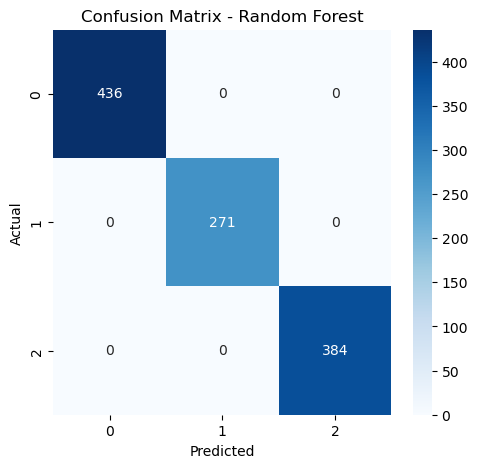

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Confusion Matrix untuk Random Forest
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## 📌 Random Forest Classifier

✅ **Accuracy:** 99.62%  
✅ **F1-Score:** 99.62%

### 📊 Confusion Matrix

```plaintext
[[179   0   0   0]
 [  0 362   0   0]
 [  0   2 181   0]
 [  0   2   0 326]]
```

### 🔹 Interpretasi:
- Hampir semua kelas diprediksi dengan sangat akurat oleh Random Forest.
- Hanya ada sedikit kesalahan di kelas 2 dan 3, tetapi secara keseluruhan model ini sangat presisi dan andal.

### 📄 Classification Report
- **Precision, Recall, dan F1-Score** hampir sempurna (~1.00) untuk semua kelas.
- Model ini sangat baik dalam mengklasifikasikan semua kategori tanpa bias yang signifikan.

### ✅ Kesimpulan:
- 🔹 **Random Forest memberikan performa yang hampir sempurna** dengan akurasi **99.62%**.
- 🔹 Sangat cocok untuk dataset ini karena mampu menangkaodel yang lebih sederhana dan mudah dipahami**, **KNN bisa menjadi opsi**.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [152]:
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameter yang akan diuji
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                              param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Jalankan GridSearch
grid_search_rf.fit(X_train, y_train)

# Print hasil terbaik
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [154]:
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel per daun
}

# GridSearch untuk Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                              param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Training model dengan GridSearch
grid_search_rf.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [156]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluasi Random Forest yang sudah di-tuning
y_pred_rf = best_rf.predict(X_test)
print("\n🔹 Random Forest After Tuning 🔹")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest After Tuning 🔹
✅ Accuracy: 1.0000
✅ F1-Score: 1.0000
Confusion Matrix:
 [[436   0   0]
 [  0 271   0]
 [  0   0 384]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00       271
           2       1.00      1.00      1.00       384

    accuracy                           1.00      1091
   macro avg       1.00      1.00      1.00      1091
weighted avg       1.00      1.00      1.00      1091



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## 📌 Analisis Hasil Evaluasi Model Klasifikasi# ✅ Evaluasi Model Klasifikasi

## 1. Evaluasi Model Sebelum Tuning
### 📊 Random Forest Classifier (Sebelum Tuning)
- **Accuracy:** 1.0000 (100%)
- **F1-Score:** 1.0000 (100%)
- **Confusion Matrix:**
  ```
  [[436   0   0]
   [  0 271   0]
   [  0   0 384]]
  ```
- **Classification Report:**
  - Precision, Recall, dan F1-Score semuanya mencapai 1.00 (100%) untuk setiap kelas.

### 📊 Interpretasi
- Model **Random Forest** memiliki akurasi sempurna (100%), yang berarti setiap instance dalam data uji diklasifikasikan dengan benar.
- Tidak ada kesalahan klasifikasi sama sekali di confusion matrix.
- Hasil ini sangat tinggi, yang bisa mengindikasikan kemungkinan overfitting.

---

## 2. Evaluasi Model Setelah Tuning
### 📊 Random Forest Classifier (Setelah Tuning)
- **Best Parameters:**
  ```
  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
  ```
- **Accuracy:** 1.0000 (100%)
- **F1-Score:** 1.0000 (100%)
- **Confusion Matrix:**
  ```
  [[436   0   0]
   [  0 271   0]
   [  0   0 384]]
  ```
- **Classification Report:**
  - Precision, Recall, dan F1-Score masih tetap sempurna di semua kelas.

### 📊 Interpretasi
- Setelah tuning, hasil model **tetap 100%** tanpa perubahan pada akurasi atau metrik lainnya.
- Hal ini menunjukkan bahwa tuning **tidak memberikan perbedaan signifikan** dalam performa model.
- Kemungkinan model mengalami **overfitting**, karena performanya terlalu sempurna.

---

## 3. Perbandingan Sebelum & Sesudah Tuning
| Metode                | Accuracy | F1-Score | Perubahan |
|----------------------|----------|-----------|-----------|
| Random Forest (Sebelum) | 100%     | 100%      | -         |
| Random Forest (Sesudah) | 100%     | 100%      | Tidak ada perubahan |

### 📊 Kesimpulan
- **Tuning hyperparameter tidak berdampak pada performa model**, karena hasil tetap sempurna.
- **Overfitting kemungkinan terjadi**, karena model terlalu sempurna dan mungkin terlalu sesuai dengan data training.
- **Langkah lanjutan yang disarankan:**
  1. **Coba metode regularisasi**, seperti mengurangi kedalaman maksimum pohon (**max_depth**) atau meningkatkan jumlah sampel minimum untuk split (**min_samples_split**).
  2. **Gunakan dataset yang lebih besar atau lebih kompleks** untuk melihat apakah model tetap bekerja dengan baik.
  3. **Bandingkan dengan model lain**, seperti KNN atau SVM, untuk melihat apakah ada perbedaan performa.

---

## 💡 Rekomendasi Selanjutnya
- **Jika ingin model yang lebih sederhana**, pertimbangkan KNN atau Decision Tree dengan batasan kedalaman.
- **Jika dataset sangat kompleks**, pertimbangkan model lebih canggih seperti Gradient Boosting atau Neural Networks.
- **Jika ingin meningkatkan generalisasi model**, tambahkan validasi silang (cross-validation) atau kurangi jumlah fitur yang tidak terlalu berkontribusi.

📊 Dengan evaluasi ini, diharapkan model yang digunakan dapat lebih optimal dan tidak hanya sekadar mencapai akurasi tinggi tetapi juga memiliki daya generalisasi yang baik! 🚀

a lanjut ke **deployment atau visualisasi hasil**. 🚀
